In [5]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib as mlp
import matplotlib.pyplot as plt
from metpy.units import units
from metpy import calc as mpcalc
import math
import netCDF4
from netCDF4 import Dataset
import xesmf as xe
from datetime import datetime, date, timedelta

In [6]:
real1_ds = xr.open_dataset('/langlab_rit/andrea/ERA5data/era5_202101_t.nc')
real2_ds = xr.open_dataset('/langlab_rit/andrea/ERA5data/era5_202102_t.nc')

In [7]:
#Regridding ERA5 data using xesmf

ds_out = xr.Dataset(
    {
        "lon": (["lon"], np.arange(0, 360, 1.5)),
        "lat": (["lat"], np.arange(-90, 91.5, 1.5)),
    }
)

regridder = xe.Regridder(real1_ds, ds_out, "bilinear")
regridder

xESMF Regridder 
Regridding algorithm:       bilinear 
Weight filename:            bilinear_401x1440_121x240.nc 
Reuse pre-computed weights? False 
Input grid shape:           (401, 1440) 
Output grid shape:          (121, 240) 
Periodic in longitude?      False

In [8]:
real1_rgrd = regridder(real1_ds)
real2_rgrd = regridder(real2_ds)

/knight/anaconda_jan21/envs/aug21/lib/python3.8/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


In [30]:
# Vertical level specificaton
vlevel = 1000
levelStr = str(vlevel)

minlat = 25
maxlat = 50
minlon = 235
maxlon = 285

In [31]:
real1_rgrd

<xarray.Dataset>
Dimensions:  (time: 124, level: 19, lat: 121, lon: 240)
Coordinates:
  * level    (level) int32 1 3 5 7 10 30 50 70 ... 300 400 500 700 850 925 1000
  * time     (time) datetime64[ns] 2021-01-01 ... 2021-01-31T18:00:00
  * lon      (lon) float64 0.0 1.5 3.0 4.5 6.0 ... 352.5 354.0 355.5 357.0 358.5
  * lat      (lat) float64 -90.0 -88.5 -87.0 -85.5 -84.0 ... 85.5 87.0 88.5 90.0
Data variables:
    t        (time, level, lat, lon) float64 0.0 0.0 0.0 ... 242.3 242.3 242.3
Attributes:
    regrid_method:  bilinear

In [32]:
t = real1_rgrd['t'].sel(level=vlevel)#<--forecasted temps at 1000mb
rt1_rd = t.sel(time=t.time.dt.hour == 0)

t2 = real2_rgrd['t'].sel(level=vlevel)#<--forecasted temps at 1000mb
rt2_rd = t2.sel(time=t2.time.dt.hour == 0)
t2_plt = rt2_rd.sel(lat=slice(minlat,maxlat), lon=slice(minlon,maxlon))

In [38]:
t2_cel = t2_plt - 273.15
t2_cel

<xarray.DataArray 't' (time: 28, lat: 20, lon: 34)>
array([[[ 17.26400146,  17.69899902,  17.51690063, ...,  26.21682129,
          23.30739746,  23.88201294],
        [ 17.49868164,  17.13652954,  16.92611084, ...,  23.16576538,
          23.04033813,  23.69384155],
        [ 16.8472229 ,  16.5720459 ,  15.99544678, ...,  22.52440796,
          23.04235229,  23.17385254],
        ...,
        [  6.97991333,   8.78057251,   9.99855957, ..., -12.80124512,
         -13.42035522, -11.35666504],
        [  5.86104736,   6.52669678,   9.47658691, ..., -15.081427  ,
         -14.37735596, -14.79212036],
        [  7.0750061 ,   7.00014648,   7.20244751, ..., -16.24683228,
         -15.57913818, -14.72940674]],

       [[ 18.87651978,  19.21843872,  18.66811523, ...,  23.8718811 ,
          24.95836792,  26.1925293 ],
        [ 18.09755859,  17.37526855,  17.07180176, ...,  23.2993103 ,
          24.42421875,  25.12224731],
        [ 17.08797607,  16.24227295,  16.12288818, ...,  21.43590698,
          23.12328491,  24.53551636],
...
        [  5.35119019,   5.6668335 ,   3.92281494, ...,  -0.52832642,
          -1.5986084 ,  -4.06491699],
        [  5.78011475,   6.76140747,   3.60717163, ...,  -0.09940186,
          -2.05383911,  -4.47766724],
        [  6.58132324,   5.04973755,   3.68203125, ...,   0.30120239,
          -1.73010864,  -3.90308228]],

       [[ 16.65297852,  17.11025391,  17.03334961, ...,  26.29976807,
          24.2401062 ,  24.43435059],
        [ 16.21395264,  16.0642334 ,  15.93474731, ...,  23.73632202,
          23.81524048,  23.68374023],
        [ 15.29540405,  15.50377808,  15.08498535, ...,  23.61089478,
          23.48949585,  23.36809692],
        ...,
        [  4.7138916 ,   7.70626221,   5.01534424, ...,   0.50353394,
          -0.13379517,  -1.73010864],
        [  3.80544434,   5.39977417,   3.76702271, ...,   0.67754517,
          -0.75290527,  -2.05383911],
        [  3.49590454,   3.4979187 ,   3.64156494, ..., -11.92316284,
          -5.80490723,  -1.05838623]]])
Coordinates:
    level    int32 1000
  * time     (time) datetime64[ns] 2021-02-01 2021-02-02 ... 2021-02-28
  * lon      (lon) float64 235.5 237.0 238.5 240.0 ... 280.5 282.0 283.5 285.0
  * lat      (lat) float64 21.0 22.5 24.0 25.5 27.0 ... 43.5 45.0 46.5 48.0 49.5

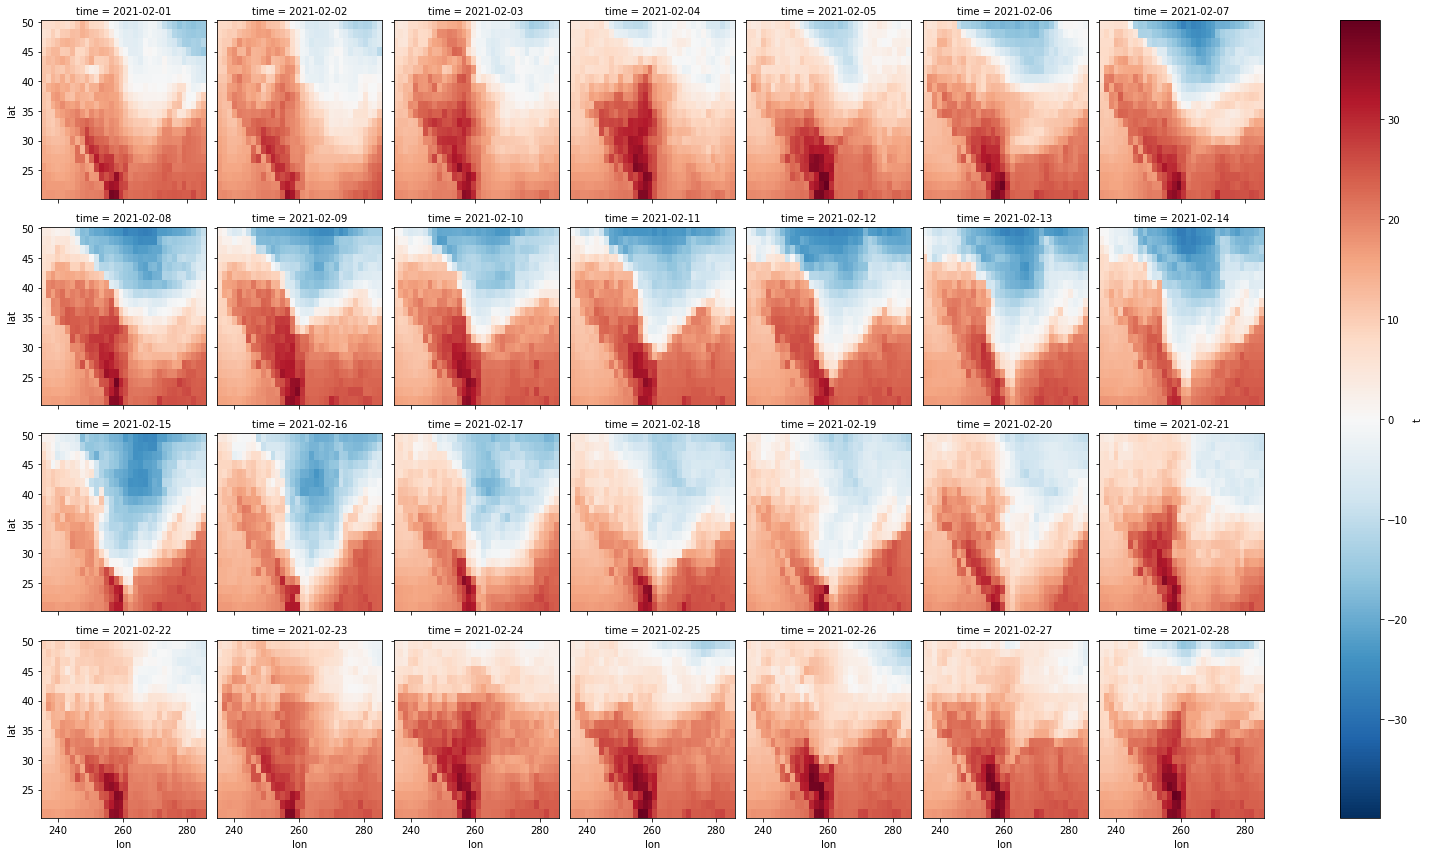

In [39]:
temp_plots = t2_cel.plot(x="lon", y="lat", col="time", col_wrap=7, cmap='RdBu_r')